In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

Cargamos el dataset sobre los clientes de una entidad bancaria

In [2]:
banco = pd.read_csv("/kaggle/input/bank-customer-churn/Customer-Churn-Records.csv")

 Observamos cuantas filas y columnas contiene el dataset

In [3]:
banco.shape

(10000, 18)

Observamos las primeras 10 filas del dataset para tener darle un vistazo general

In [4]:
banco.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,1,5,DIAMOND,484
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0,0,2,SILVER,206
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,1,2,DIAMOND,282
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0,0,3,GOLD,251
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0,0,3,GOLD,342


Observamos el nombre de cada una de las columnas (variables) del dataset

In [5]:
banco.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

Observo si hay valores nulos contenidos en el dataset

In [6]:
banco.isna().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

Vemos en la tabla anterior que ninguna de las columnas posee valores nulos

Ahora queremos ir removiendo aquellas columnas que sean insignificantes para nuestro posterior analisis

Empezamos removiendo la columna de "RowNumber", ya que es una columna de tipo indice, y para eso ya tenemos el indice que por defecto nos aparece cuando observamos el dataset

In [7]:
banco.pop("RowNumber")

0           1
1           2
2           3
3           4
4           5
        ...  
9995     9996
9996     9997
9997     9998
9998     9999
9999    10000
Name: RowNumber, Length: 10000, dtype: int64

Lo que vamos a hacer es dejar la columna "CustomerId" como el indice de las filas

In [8]:
banco = banco.set_index("CustomerId")

In [9]:
banco.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
CustomerId,,,,,,,,,,,,,,,,
15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


Ahora veamos mas en detalle cada una de las variables 

In [10]:
banco.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203800,0.402842,0.00,0.00,0.000,0.0000,1.00
Complain,10000.0,0.204400,0.403283,0.00,0.00,0.000,0.0000,1.00


Puedo graficar la columa "Age" para poder ver la distribucion de cada uno de los casos e incluso observar como se dividen entre los difertenes cuartiles, tal como lo pudimos observar en la tabla anterior

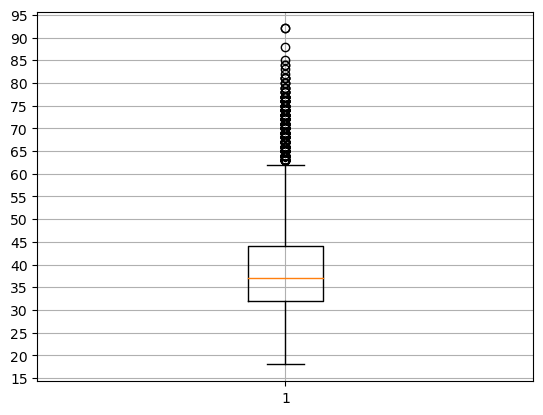

In [11]:
age = banco.loc[:,"Age"]
plt.yticks(np.arange(10, 100, 5))
plt.grid(True)
plt.boxplot(age)
plt.show()

Los circulos que estan por encima del valor 65 son considerados outliers. Son casos atipicos

La linea naranja nos indica que ahi esta media de esta variable

Puedo tener a mano cada valor correspondiente a cada cuartil de esta variable para poder tener una mejor idea del comportamiento de esta

In [12]:
(np.min(age), np.quantile(age, 0.25), np.median(age), np.quantile(age, 0.75), np.max(age))

(18, 32.0, 37.0, 44.0, 92)

Puedo usar la tabla crosstab de pandas para poder cruzar dos variables del dataset a ver como se distribuyen los casos. Ademas le puedo agregar diferentes metricas para que sea mas facil su lectura

Vamos a cruzar las variables "Exited" y "Complain" para observar cuantas de aquellas personas que tuvieron alguna queja, despues dejaron de ser clientes del banco.

"Exited" tiene dos valores: 1 (Si) y 0 (No) y "Complain" tiene dos valores tambien: 1 (Si) y 0 (No)

<Axes: xlabel='Complain', ylabel='Exited'>

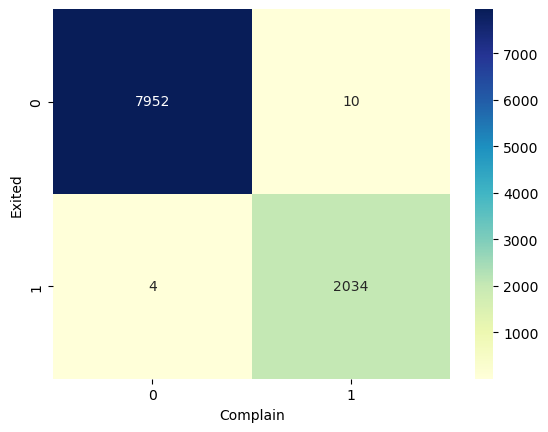

In [13]:
tabla_frecuencia = pd.crosstab(banco['Exited'], banco['Complain'])
sns.heatmap(tabla_frecuencia, cmap="YlGnBu", annot=True, fmt="d")

Con seaborn le podemos agregar una intensidad de colores dependiendo de la cantidad de casos en cada casillero

Si quiero observar la correlacion entre todas las variables, primero me tengo que asegurar de que todas las variables puedan graficarse en la tabla. Sin son variables del tipo "object" entonces no van a figurar en la tabla

In [14]:
banco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 15634602 to 15628319
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Surname             10000 non-null  object 
 1   CreditScore         10000 non-null  int64  
 2   Geography           10000 non-null  object 
 3   Gender              10000 non-null  object 
 4   Age                 10000 non-null  int64  
 5   Tenure              10000 non-null  int64  
 6   Balance             10000 non-null  float64
 7   NumOfProducts       10000 non-null  int64  
 8   HasCrCard           10000 non-null  int64  
 9   IsActiveMember      10000 non-null  int64  
 10  EstimatedSalary     10000 non-null  float64
 11  Exited              10000 non-null  int64  
 12  Complain            10000 non-null  int64  
 13  Satisfaction Score  10000 non-null  int64  
 14  Card Type           10000 non-null  object 
 15  Point Earned        10000 non-null  int64  

En la tabla de arriba podemos observar que hay 4 variables que son del tipo "object". Lo que vamos a hacer es codificarlas

Pero si son muchas dimensiones por variable, no sera un trabajo engorroso tener de codificar una por una?

Lo veremos observando cuantos valores unicos hay por cada variable

In [15]:
print("Valores unicos de Gender:  ")
print(banco.Gender.unique())

print("                           ")

print("Valores unicos de Geography: ")
print(banco.Geography.unique())

print("                           ")

print("Valores unicos de Card Type: ")
print(banco["Card Type"].unique())

Valores unicos de Gender:  
['Female' 'Male']
                           
Valores unicos de Geography: 
['France' 'Spain' 'Germany']
                           
Valores unicos de Card Type: 
['DIAMOND' 'GOLD' 'SILVER' 'PLATINUM']


Son pocas las dimensiones por cada una de las variables, por lo que las codificaremos manualmente:

In [16]:
codificacion_manual = {"Male": 1, "Female": 2}
banco["Gender"] = banco["Gender"].map(codificacion_manual)

cod_manual = {"Spain": 1, "France": 2, "Germany": 3}
banco["Geography"] = banco["Geography"].map(cod_manual)

c_manual = {"DIAMOND": 1, "GOLD": 2, "PLATINUM": 3, "SILVER": 4}
banco["Card Type"] = banco["Card Type"].map(c_manual)

Y ahora veamos si funciono, mostrando de nuevo las primeras 5 filas del dataset

In [17]:
banco.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
CustomerId,,,,,,,,,,,,,,,,
15634602,Hargrave,619,2,2,42,2,0.00,1,1,1,101348.88,1,1,2,1,464
15647311,Hill,608,1,2,41,1,83807.86,1,0,1,112542.58,0,1,3,1,456
15619304,Onio,502,2,2,42,8,159660.80,3,1,0,113931.57,1,1,3,1,377
15701354,Boni,699,2,2,39,1,0.00,2,0,0,93826.63,0,0,5,2,350
15737888,Mitchell,850,1,2,43,2,125510.82,1,1,1,79084.10,0,0,5,2,425


Vamos a remover la columna "Surname" ya que no aportara nada a un futuro analisis de los datos

Pero lo vamos hacer de la siguiente manera, voy a cambiar el orden de las columnas, pero omitiendo la columna "Surname", por lo que el programa la va a descartar del dataset

In [18]:
nuevas_columnas = ["Exited", "CreditScore", "Geography", "Gender", "Age", "Tenure", "Balance", "NumOfProducts", "HasCrCard", "IsActiveMember", "EstimatedSalary", "Complain", "Satisfaction Score", "Card Type" ,"Point Earned"]
banco = banco[nuevas_columnas]

Ahora veamos si resulto el nuevo orden de las columnas y la eliminacion de la columna "Surname"

In [19]:
banco.head(10)

,Exited,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned
CustomerId,,,,,,,,,,,,,,,
15634602,1,619,2,2,42,2,0.00,1,1,1,101348.88,1,2,1,464
15647311,0,608,1,2,41,1,83807.86,1,0,1,112542.58,1,3,1,456
15619304,1,502,2,2,42,8,159660.80,3,1,0,113931.57,1,3,1,377
15701354,0,699,2,2,39,1,0.00,2,0,0,93826.63,0,5,2,350
15737888,0,850,1,2,43,2,125510.82,1,1,1,79084.10,0,5,2,425
15574012,1,645,1,1,44,8,113755.78,2,1,0,149756.71,1,5,1,484
15592531,0,822,2,1,50,7,0.00,2,1,1,10062.80,0,2,4,206
15656148,1,376,3,2,29,4,115046.74,4,1,0,119346.88,1,2,1,282
15792365,0,501,2,1,44,4,142051.07,2,0,1,74940.50,0,3,2,251


In [20]:
#Por supuesto que contamos con menos columnas que al principio
banco.shape

(10000, 15)

Podemos construir una matriz de correlacion para poder ver como se correlaciona cada variable con el resto

In [21]:
banco.corr()

,Exited,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned
Exited,1.000000,-0.026771,0.138688,0.106267,0.285296,-0.013656,0.118577,-0.047611,-0.006976,-0.156356,0.012490,0.995693,-0.005849,-0.010861,-0.004628
CreditScore,-0.026771,1.000000,0.000478,0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027048,-0.012599,-0.006936,0.000077
Geography,0.138688,0.000478,1.000000,0.025446,0.029824,-0.002713,0.328736,-0.011923,0.014734,-0.022807,0.010285,0.140286,-0.001958,-0.009110,0.013698
Gender,0.106267,0.002857,0.025446,1.000000,0.027544,-0.014733,-0.012087,0.021859,-0.005766,-0.022544,0.008112,0.106287,-0.000242,0.008726,0.013225
Age,0.285296,-0.003965,0.029824,0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.283530,-0.000876,-0.006997,0.002222
Tenure,-0.013656,0.000842,-0.002713,-0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.013047,0.008663,-0.001414,-0.010196
Balance,0.118577,0.006268,0.328736,-0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.119124,-0.002588,-0.027059,0.014608
NumOfProducts,-0.047611,0.012238,-0.011923,0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.046357,-0.011394,0.020387,-0.015330
HasCrCard,-0.006976,-0.005458,0.014734,-0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007095,-0.000212,0.005809,-0.011041
IsActiveMember,-0.156356,0.025651,-0.022807,-0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.154741,0.010236,0.016247,-0.004983


Para facilitar la  lectura, voy a utilizar Seaborn y Pyplot para hacer un grafico mas amigable para la vista y la lectura

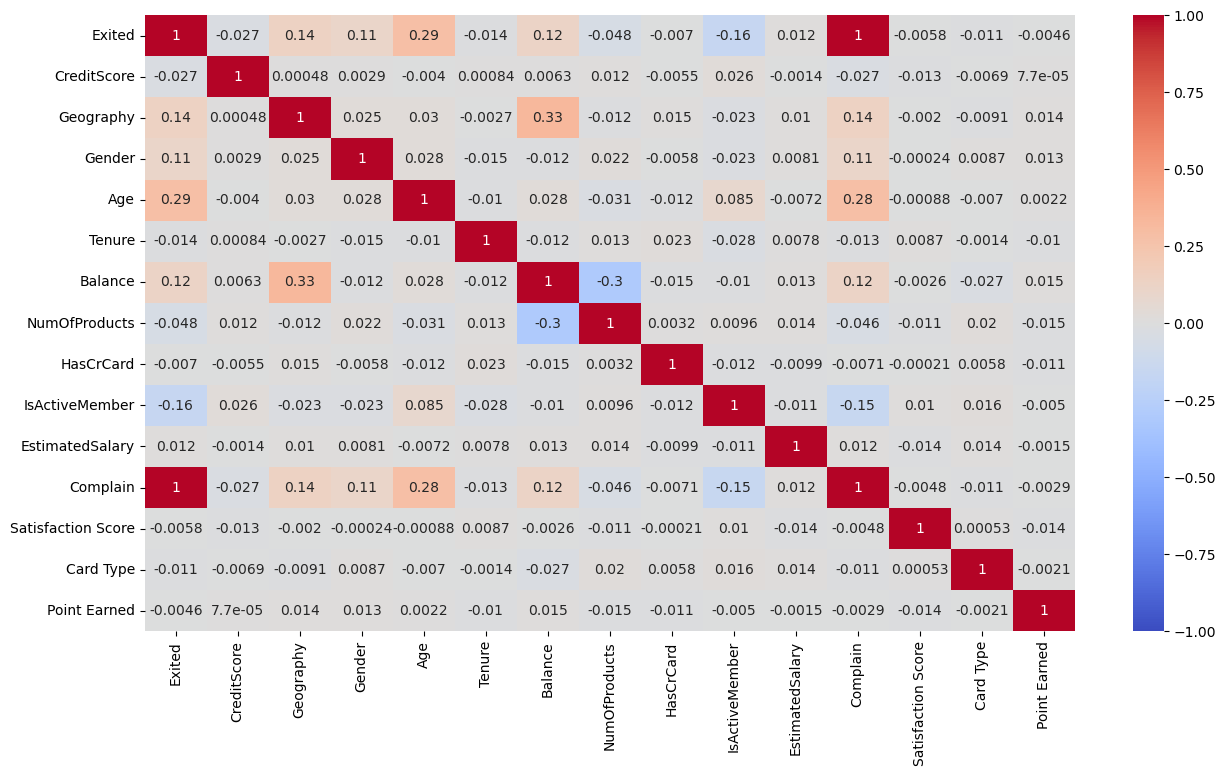

In [22]:
correlation_matrix = banco.corr()
rounded_matrix = np.round(correlation_matrix, decimals=2)
plt.figure(figsize = (15,8))
sns.heatmap(correlation_matrix, vmax=1, vmin=-1, annot=True, cmap="coolwarm")
plt.show()

Al ser un heatmap se puede jugar con los colores en base a los resultados de cada casillero. En este caso cuanto mas se acerca a rojo, es que mas tiende a 1 y por ende a una correlacion positiva. Por el contrario, cuanto mas se acerca al azul, es que mas tiende al -1, es decir a una correlacion negativa

Un poco podemos observar el tipo de dato que contiene cada columna

In [23]:
banco.dtypes

Exited                  int64
CreditScore             int64
Geography               int64
Gender                  int64
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Complain                int64
Satisfaction Score      int64
Card Type               int64
Point Earned            int64
dtype: object

Son todos valores numericos, por supuesto esto fue gracias a la codificacion previa de algunas variables anteriormente